## Infos
### Transactions (20.712.225 linhas)

| Campo | Tipo | Observações | Analisado |
|-------|------|-------------|-----------|
| msno | String | Sem valores nulos | ✅ |
| payment_method_id | Int (categoria) | Sem valores nulos, 40 métodos | ✅ |
| payment_plan_days | Int | Sem valores nulos | ✅ |
| plan_list_price | Int | Sem valores nulos, 51 valores de planos | ✅ |
| actual_amount_paid | Int | Sem valores nulos | ✅ |
| is_auto_renew | Boolean | Sem valores nulos | ✅ |
| transaction_date | Datetime | Sem valores nulos | ✅ |
| membership_expire_date | Datetime | Sem valores nulos | ✅ |
| is_cancel | Boolean | Sem valores nulos | ✅ |
| safra | Datetime (ano + mês do campo transaction_date) | Sem valores nulos | ✅ |
| discount | Int | Sem valores nulos, valor do plano - total pago | ✅ |
| price_per_month | Int | Sem valores nulos, preço por mês | ✅ |
| transaction_date_year | Int | (Gerada) Derivado de transaction_date | ✅ |
| transaction_date_month | Int | (Gerada) Derivado de transaction_date | ✅ |
| transaction_date_day | Int | (Gerada) Derivado de transaction_date | ✅ |
| transaction_date_day_of_week | Int | (Gerada) Derivado de transaction_date | ✅ |
| transaction_date_day_of_year | Int | (Gerada) Derivado de transaction_date | ✅ |
| membership_expire_date_year | Int | (Gerada) Derivado de membership_expire_date | ✅ |
| membership_expire_date_month | Int | (Gerada) Derivado de membership_expire_date | ✅ |
| membership_expire_date_day | Int | (Gerada) Derivado de membership_expire_date | ✅ |
| membership_expire_date_day_of_week | Int | (Gerada) Derivado de membership_expire_date | ✅ |
| membership_expire_date_day_of_year | Int | (Gerada) Derivado de membership_expire_date | ✅ |

<br>

**TODO**<br>
- Podemos remover o campo `safra` pois ele está contido em `transaction_date` ✅
- Separar campos Datetime em ano, mês e dia
    - transaction_date ✅
    - membership_expire_date ✅
- Criar um campo de "desconto": diferença entre o plano do preço e o valor pago ✅
- Remover outliers do campo `membership_expire_date` ✅
- Criar coluna preço / mês ✅

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from Utils.DataLoader import DataLoader
from Utils.DataAnalysis import DataAnalysis
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
from Utils import PandasNotebookConfigs

In [ ]:
DATA_LOADER = DataLoader()
DATA_ANALYSIS = DataAnalysis()

PandasNotebookConfigs.config()

# Transactions

In [7]:
transactions_df = DATA_LOADER.load_transactions_df()

In [9]:
transactions_df[['price_per_month', 'actual_amount_paid', 'payment_plan_days']].head()

,price_per_month,actual_amount_paid,payment_plan_days
0,130.83,1788,410
1,149.00,149,30
2,149.00,149,30
3,149.00,149,30
4,144.19,149,31


In [6]:
transactions_df[transactions_df['discount'] < 0]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_year,transaction_date_month,transaction_date_day,transaction_date_day_of_week,transaction_date_day_of_year,membership_expire_date_year,membership_expire_date_month,membership_expire_date_day,membership_expire_date_day_of_week,membership_expire_date_day_of_year,discount


In [18]:
print(f'Rows qty: {len(transactions_df)}')

Rows qty: 20705003


In [17]:
transactions_df.dtypes

msno                                          object
payment_method_id                              int64
payment_plan_days                              int64
plan_list_price                                int64
actual_amount_paid                             int64
is_auto_renew                                   bool
transaction_date                      datetime64[ns]
membership_expire_date                datetime64[ns]
is_cancel                                       bool
transaction_date_year                          int32
transaction_date_month                         int32
transaction_date_day                           int32
transaction_date_day_of_week                   int32
transaction_date_day_of_year                   int32
membership_expire_date_year                    int32
membership_expire_date_month                   int32
membership_expire_date_day                     int32
membership_expire_date_day_of_week             int32
membership_expire_date_day_of_year            

In [ ]:
# # Checking if safra is inside transaction_date column
# # If yes, we can remove this field
# for index, row in transactions_df.iterrows():
#     if str(row['safra']) not in str(row['transaction_date']):
#         print(f'Found! {row}')

In [8]:
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,False,2015-11-21,2017-01-04,False
1,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,True,2015-05-26,2015-06-26,False
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,30,149,149,True,2015-09-26,2015-10-26,False
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,41,30,149,149,True,2016-06-15,2016-07-15,False
4,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,40,31,149,149,True,2015-01-13,2015-02-16,False


In [18]:
transactions_df.isna().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [17]:
transactions_df.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,transaction_date,membership_expire_date
count,2.071222e+07,2.071222e+07,2.071222e+07,2.071222e+07,20712225,20712225
mean,3.892650e+01,3.142900e+01,1.402409e+02,1.428347e+02,2016-03-12 01:00:59.224674560,2016-04-15 15:00:59.945293568
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-01-01 00:00:00,1970-01-01 00:00:00
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,2015-09-09 00:00:00,2015-10-19 00:00:00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,2016-03-26 00:00:00,2016-05-03 00:00:00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,2016-09-28 00:00:00,2016-10-31 00:00:00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,2017-02-28 00:00:00,2017-03-31 00:00:00
std,3.506286e+00,3.055983e+01,1.322768e+02,1.336094e+02,NaN,NaN


<Axes: xlabel='transaction_date'>

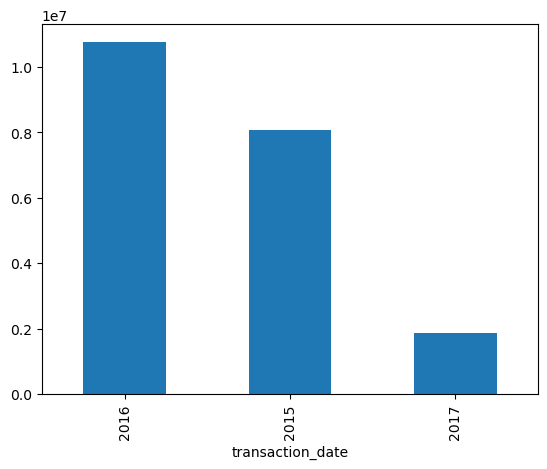

In [12]:
transactions_df.transaction_date.dt.year.value_counts().plot.bar()

<Axes: xlabel='is_auto_renew'>

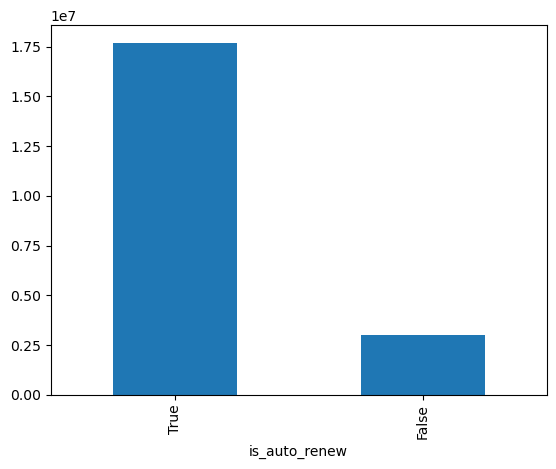

In [11]:
transactions_df.is_auto_renew.value_counts().plot.bar()

(is_cancel
 False    20031271
 True       680954
 Name: count, dtype: int64,
 <Axes: xlabel='is_cancel'>)

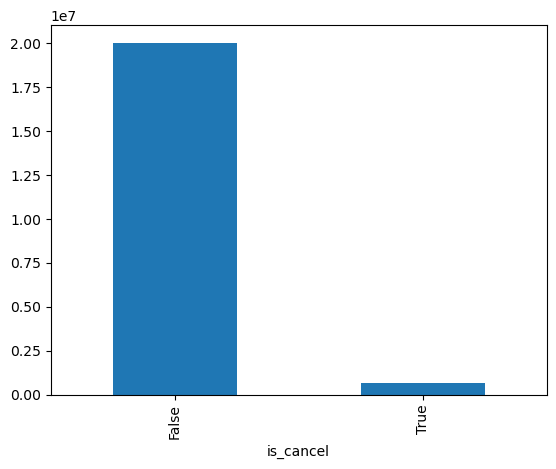

In [14]:
transactions_df.is_cancel.value_counts(), transactions_df.is_cancel.value_counts().plot.bar()

In [16]:
transactions_df.membership_expire_date.dt.year.value_counts()

membership_expire_date
2016    10662667
2015     7038483
2017     3003853
2014        3553
2013        2146
1970        1499
2012          12
2010           3
2007           3
1999           2
2009           2
2005           1
2008           1
Name: count, dtype: int64

In [21]:
len(transactions_df.payment_method_id.unique())

40

In [27]:
len(transactions_df.plan_list_price.unique())

51

In [32]:
len(transactions_df.plan_list_price.value_counts())

51

In [37]:
transactions_df.payment_plan_days.unique()

array([410,  30,  31,   7,   0, 395, 180,  45, 195,  60,  10, 120, 100,
       360, 200,  90,  14,   1,  99, 110,  35, 400,  21, 450, 240,  66,
        70, 365,  80, 270,   3,  15, 230,   2,  95, 425, 415])

(actual_amount_paid
 149     11998045
 99       4776059
 129      1124259
 0        1047843
 180       656705
 150       373391
 119       322854
 894       111410
 1788       82809
 100        76237
 536        44129
 480        22927
 1599       11991
 477        10752
 799         6422
 300         5496
 1200        5313
 298         5167
 930         5063
 134         4625
 120         4462
 35          4352
 447         3831
 450         1379
 500         1117
 699          887
 50           751
 1000         741
 124          596
 131          571
 350          568
 400          316
 105          259
 70           195
 143          129
 2000         119
 1            111
 1150          95
 596           64
 10            54
 15            35
 127           29
 265           20
 1520          13
 800           11
 41             4
 600            3
 30             3
 210            3
 760            2
 1825           2
 849            1
 45             1
 1800           1
 890    

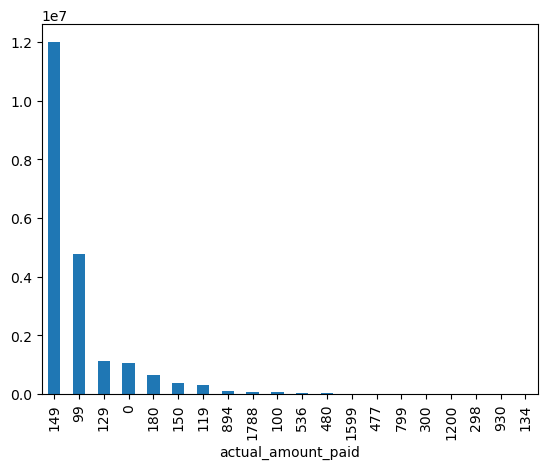

In [41]:
transactions_df.actual_amount_paid.value_counts(), transactions_df.actual_amount_paid.value_counts()[:20].plot.bar()